<a href="https://colab.research.google.com/github/jyotishna/Bank-Customer-Churn/blob/main/Walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Walmart - Confidence Interval and CLT**
Walmart is an American multinational retail corporation that operates a chain of supercenters,
discount departmental stores, and grocery stores from the United States. Walmart has more
than 100 million customers worldwide.
# Business Problem
The Management team at Walmart Inc. wants to analyze the customer purchase behavior
(specifically, purchase amount) against the customer’s gender and the various other factors to
help the business make better decisions. They want to understand if the spending habits differ
between male and female customers: Do women spend more on Black Friday than men?
(Assume 50 million customers are male and 50 million are female).

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install scipy
import scipy.stats as stats # Import the stats module from scipy
from scipy.stats import norm

In [ ]:
url = 'https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094'
df = pd.read_csv(url)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df.shape

(550068, 10)

There are 5,50,068 rows and 10 column in the walmart dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
col = ['User_ID','Product_ID','Gender','Age','City_Category','Marital_Status']
df[col] = df[col].astype('category')
df.dtypes

User_ID                       category
Product_ID                    category
Gender                        category
Age                           category
Occupation                       int64
City_Category                 category
Stay_In_Current_City_Years      object
Marital_Status                category
Product_Category                 int64
Purchase                         int64
dtype: object

In [ ]:
df.describe(include=['object','category']).T

,count,unique,top,freq
User_ID,550068,5891,1001680,1026
Product_ID,550068,3631,P00265242,1880
Gender,550068,2,M,414259
Age,550068,7,26-35,219587
City_Category,550068,3,B,231173
Stay_In_Current_City_Years,550068,5,1,193821
Marital_Status,550068,2,0,324731


* There are 5891 unique users. User ID 1001680 has shopped the most frequent from Walmart.
* There are 3631 unique products. Product ID P00265242 is the most frequent sold item.
* Men are more frequent buyers than Females.
* There are 7 unique age categories. The most frequent buyers fall under the age group of 26-35.
* There are 3 different city categories. Most frequent buyers fal under category B.
* Most people are in the current city since 1 year.
* Most customerd are unmarried.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Occupation,550068.0,8.076707,6.522660,0.0,2.0,7.0,14.0,20.0
Product_Category,550068.0,5.404270,3.936211,1.0,1.0,5.0,8.0,20.0
Purchase,550068.0,9263.968713,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


While observing the spending habits of all buyers

*   The average order value is 9263.97
*   While 50% of the buyers spend an approximate of 8047.
*   The lowest order value is as low as 12.
*   While, the highest order value is of 23961.

In [ ]:
df.nunique().sort_values(ascending=False)

Purchase                      18105
User_ID                        5891
Product_ID                     3631
Occupation                       21
Product_Category                 20
Age                               7
Stay_In_Current_City_Years        5
City_Category                     3
Gender                            2
Marital_Status                    2
dtype: int64

In [ ]:
df.duplicated().sum()

0

# Univariate analysis


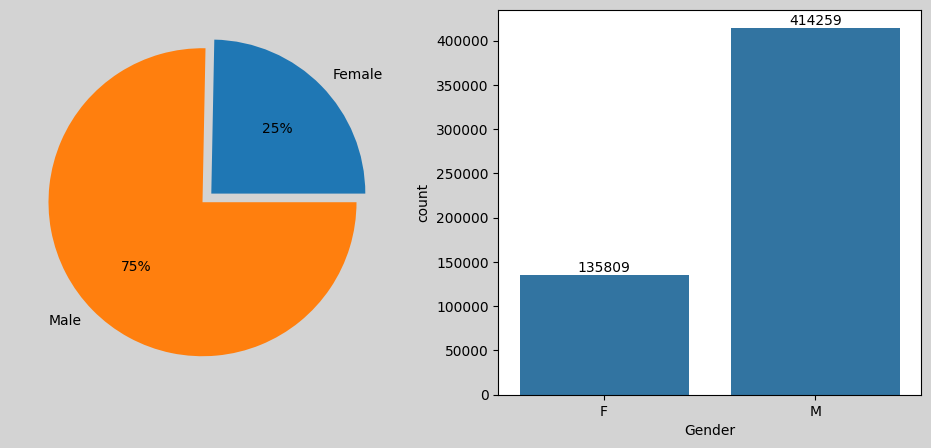

In [ ]:
plt.figure(figsize = (12,5)).set_facecolor("lightgrey")
plt.subplot(1,2,1)
labels = ['Female','Male']
plt.pie(df.groupby('Gender')['Gender'].count(), labels = labels, explode = (0.08,0), autopct = '%0.0f%%')
plt.subplot(1,2,2)
label = sns.countplot(data = df, x='Gender')
for i in label.containers:
    label.bar_label(i)
plt.show()

*   Out of 5,50,068 entries, 75% records are of men and 25% of women.
*   Approximately there are 4,14,259 records for men and 1,35,809 for Females.

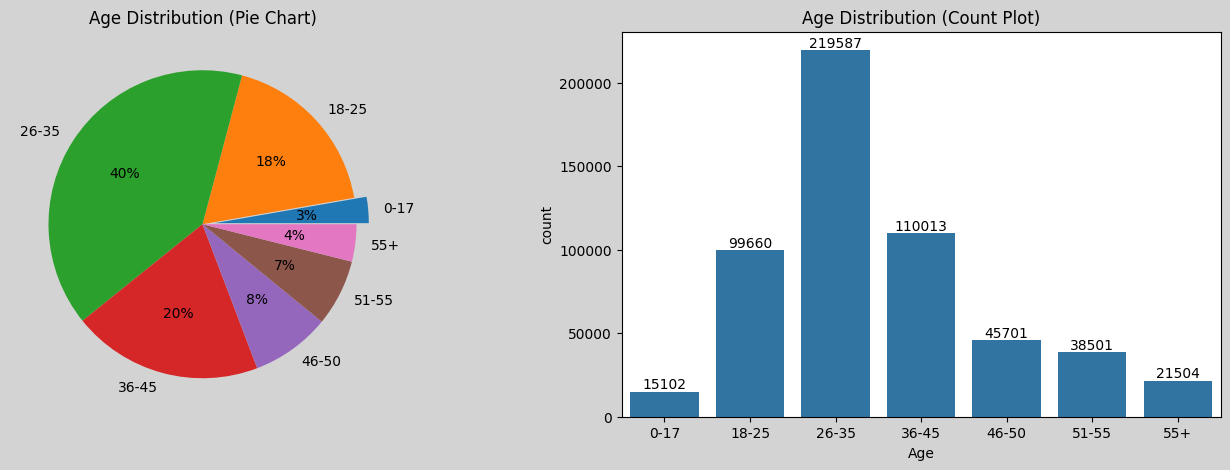

In [ ]:
plt.figure(figsize = (17,5)).set_facecolor("lightgrey")
plt.subplot(1,2,1)

# Calculate the count of each age group
age_counts = df.groupby('Age')['Age'].count()

# Ensure the number of labels matches the number of age groups
labels = age_counts.index.tolist()  # Use the index of the age_counts Series as labels

# Adjust the explode tuple to match the number of age groups (7 in this case)
plt.pie(age_counts, labels=labels, explode=(0.08,0,0,0,0,0,0), autopct='%0.0f%%')
plt.title("Age Distribution (Pie Chart)")

plt.subplot(1,2,2)
label = sns.countplot(data=df, x='Age')
plt.title("Age Distribution (Count Plot)")
for i in label.containers:
    label.bar_label(i)
plt.show()

*   40% of the buyers fall under the age group of 26-35 which is the highest amongst all age groups.
*   Approximately 0.21 million records are present for age group 26-35 followed by 0.11 million records for group 36-45.
*   Age group 0-17 and 55+ are the least frequent buyers which is only 3% and 4% of the data respectively.
*   Approximately only 15k and 21k records are there for age group 0-17 and group 55+.
*   We can observe that most buyers are in within the age of 18-45 before and after this range we can see less buyers.


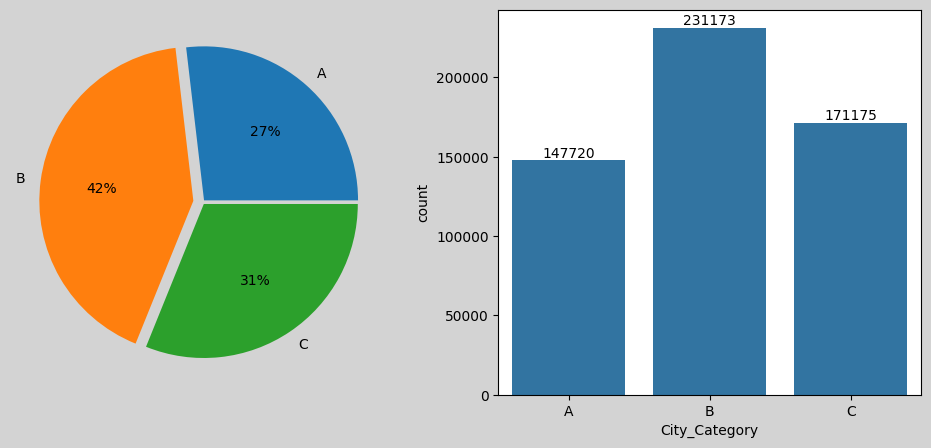

In [ ]:
plt.figure(figsize = (12,5)).set_facecolor("lightgrey")
plt.subplot(1,2,1)
labels = ['A','B','C']
plt.pie(df.groupby('City_Category')['City_Category'].count(), labels =
labels, explode = (0.015,0.06,0.015), autopct = '%0.0f%%')
plt.subplot(1,2,2)
label = sns.countplot(data = df, x='City_Category')
for i in label.containers:
    label.bar_label(i)
plt.show()

*   There are 42% buyers from City Category B, 31% from Category C and 27% from Category A
*   Approximately 0.23 million records are present for Category B, 0.17 million for Category C and 0.14 million for category A.

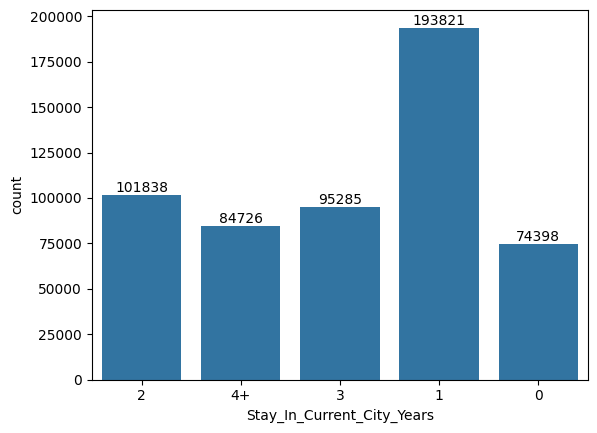

In [ ]:
label = sns.countplot(data = df, x='Stay_In_Current_City_Years')
for i in label.containers:
    label.bar_label(i)

Most buyers are in their current cities since 1 year followed by 2 years and 3 years.

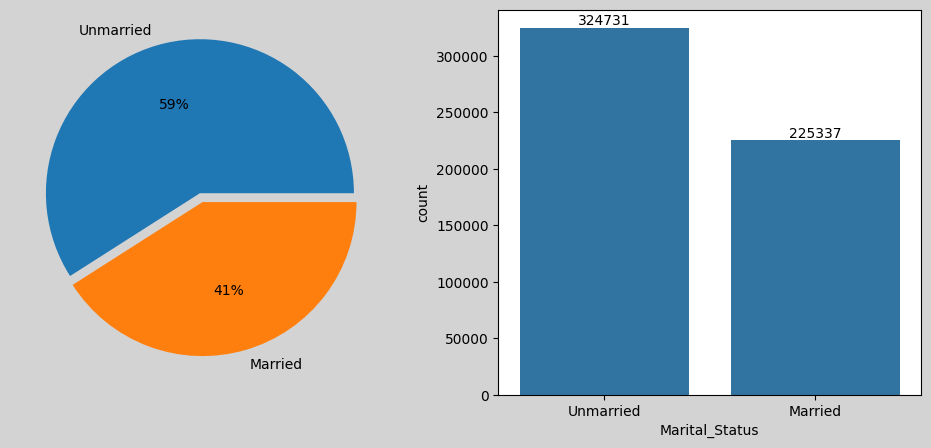

In [ ]:
df['Marital_Status'].replace(to_replace = 0, value = 'Unmarried',
inplace = True)
df['Marital_Status'].replace(to_replace = 1, value = 'Married',
inplace = True)
plt.figure(figsize = (12,5)).set_facecolor("lightgrey")
plt.subplot(1,2,1)
labels = ['Unmarried','Married']
plt.pie(df.groupby('Marital_Status')['Marital_Status'].count(), labels = labels, explode = (0.06,0), autopct = '%0.0f%%')
plt.subplot(1,2,2)
label = sns.countplot(data = df, x='Marital_Status')
for i in label.containers:
    label.bar_label(i)
plt.show()

*   We can observe that 59% of the frequent buyers are of unmarried people, while 41% of married.
*   There are an approximate of 0.32 million entries for unmarried people and 0.22 million for married people.

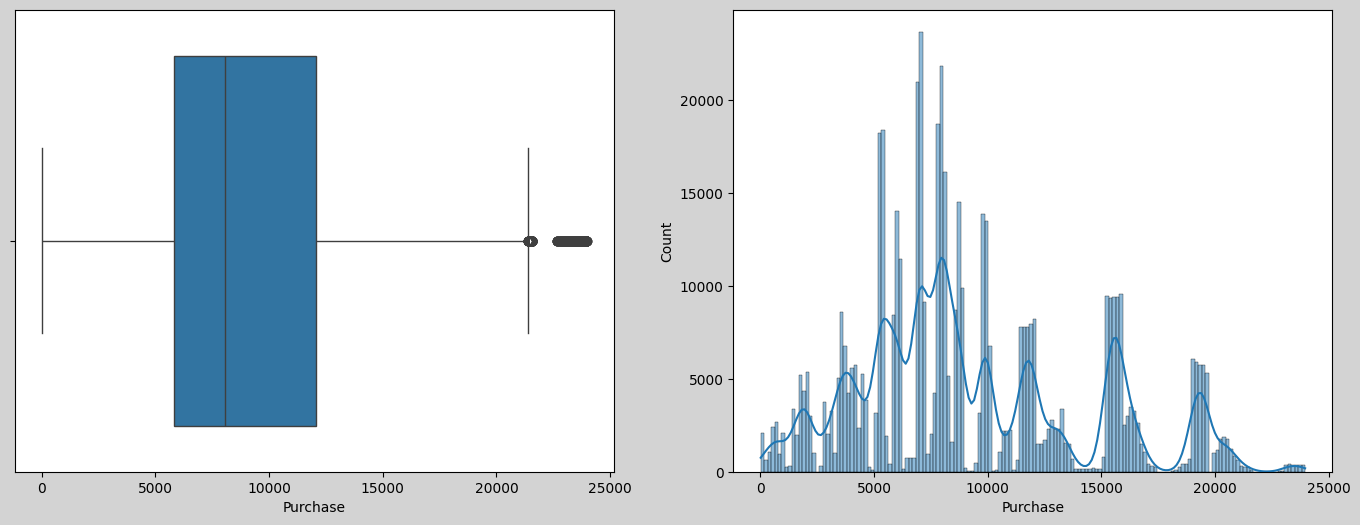

Interquartile Range (IQR): 6231.00
Lower Limit (LL): -3523.50
Upper Limit (UL): 21400.50
Number of outliers: 2677


In [ ]:
plt.figure(figsize=(17, 6)).set_facecolor("lightgrey")
plt.subplot(1,2,1)
sns.boxplot(data=df, x='Purchase', orient='h')
plt.subplot(1,2,2)
sns.histplot(data=df, x='Purchase', kde=True)
plt.show()

# Calculate Q1, Q3, and IQR
Q1 = df['Purchase'].quantile(0.25)
Q3 = df['Purchase'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper limits
LL = Q1 - 1.5 * IQR
UL = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Purchase'] < LL) | (df['Purchase'] > UL)]

print("Interquartile Range (IQR): {:.2f}".format(IQR))
print("Lower Limit (LL): {:.2f}".format(LL))
print("Upper Limit (UL): {:.2f}".format(UL))
print("Number of outliers: {}".format(len(outliers)))


* The highest recorded purchase amount in this dataset is 23961.
* The wide range between the 25th and 75th percentiles (5823 to 12054) indicates variability in purchase amounts.
* The median (8047) being lower than the mean (9264) suggests a right-skewed distribution (more high-value purchases).
* The presence of high-value outliers (e.g., the maximum purchase) affects the mean.
* Customers exhibit diverse purchasing behavior, with some making significantly higher purchases (2677).
* Further investigation into the outliers and their context (e.g., special promotions, specific customer segments) could provide valuable insights.

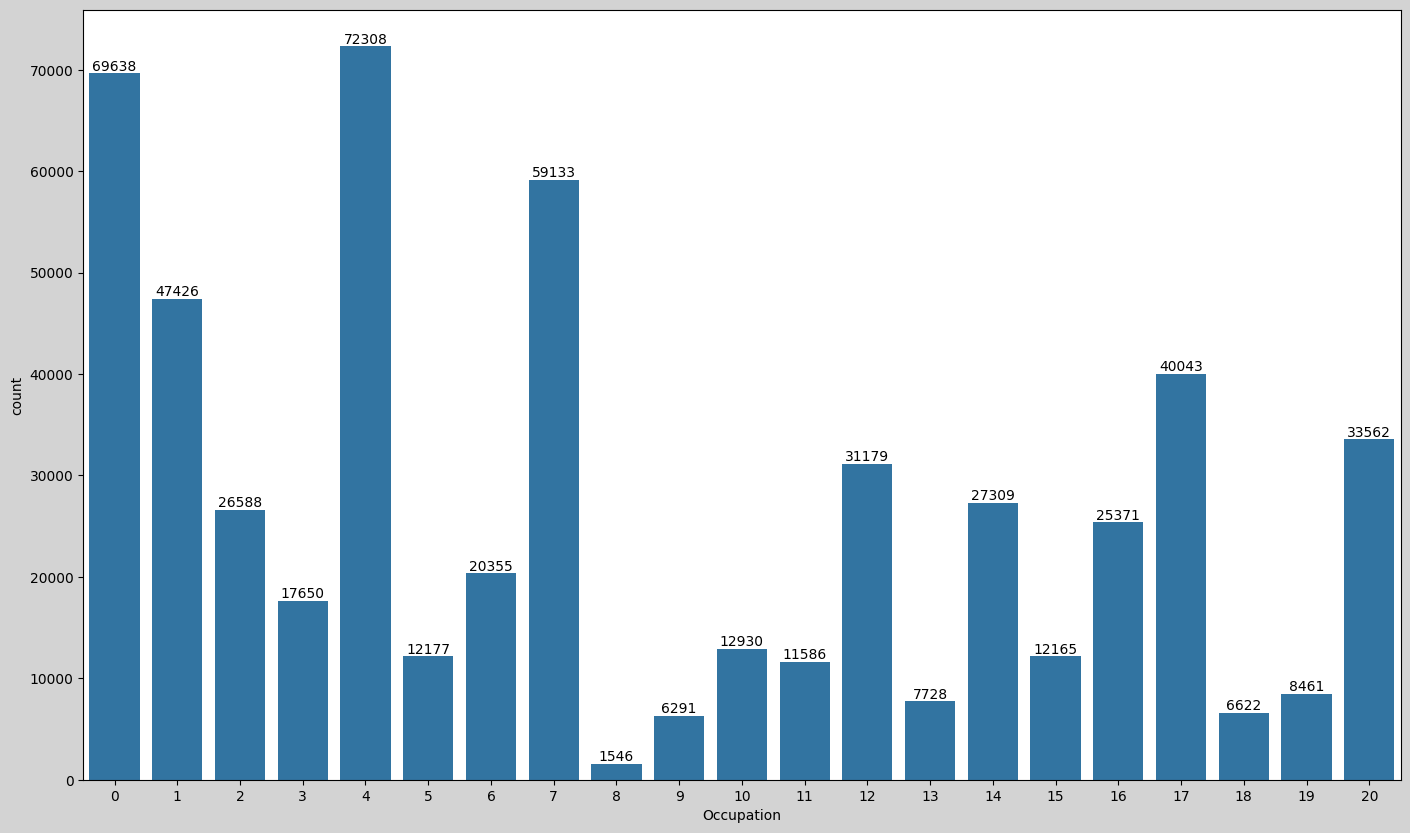

In [ ]:
plt.figure(figsize=(17, 10)).set_facecolor("lightgrey")
label = sns.countplot(data = df, x='Occupation')
for i in label.containers:
    label.bar_label(i)

* People having occupation 4 are the most frequent buyers followed by occupation 0 and 7.
* People having occupation 8 are the least frequent buyers followed by occupation 9 and 18.

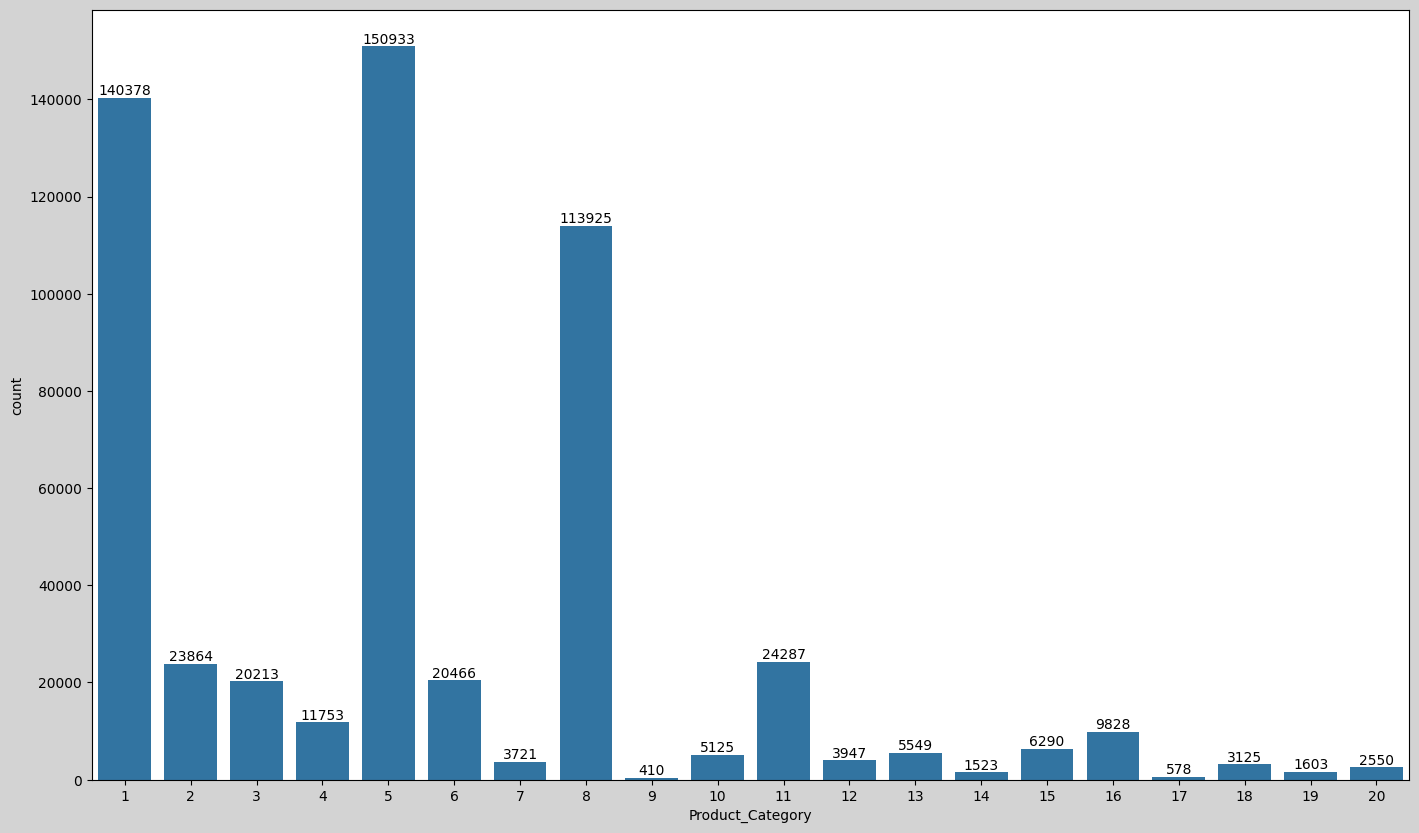

In [ ]:
plt.figure(figsize=(17, 10)).set_facecolor("lightgrey")
label = sns.countplot(data = df, x='Product_Category')
for i in label.containers:
    label.bar_label(i)

* The most frequent bought product category is 5 followed by 1 and 8.
* All the other categories are not much touched.
* The least frequent bought are category 9 followed by 17 and 14.

# Bi-variate Analysis

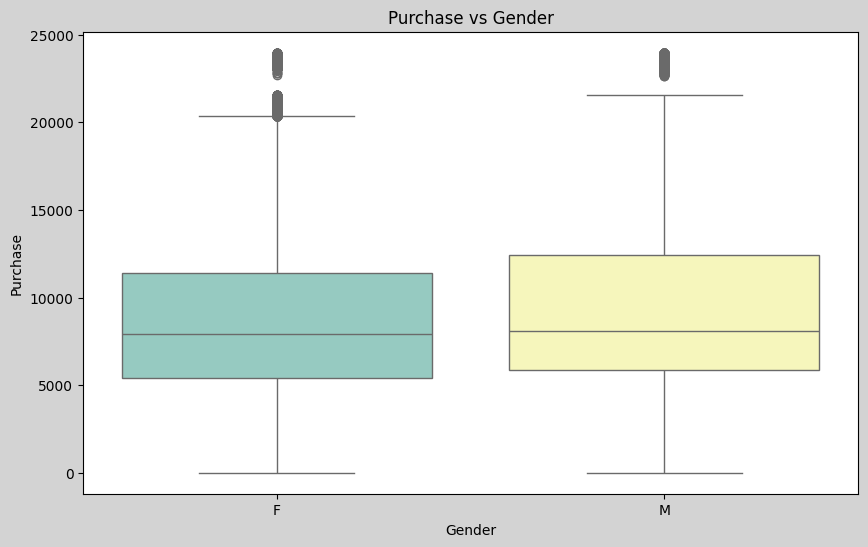

Gender F (Female) Outlier Bounds:
Lower Bound: -3517.50
Upper Bound: 20350.50

Number of Female Outliers: 2065

Gender M (Male) Outlier Bounds:
Lower Bound: -4023.50
Upper Bound: 22340.50
Number of Male Outliers: 1812


In [ ]:
plt.figure(figsize = (10,6)).set_facecolor("lightgrey")
sns.boxplot(data = df, y ='Purchase', x = 'Gender', palette = 'Set3')
plt.title('Purchase vs Gender')
plt.show()

# Calculate outlier values for each gender
def calculate_outliers(data, gender_column, purchase_column):
    # Group data by gender
    grouped_data = data.groupby(gender_column)[purchase_column]

    # Calculate quartiles
    Q1 = grouped_data.quantile(0.25)
    Q3 = grouped_data.quantile(0.75)

    # Calculate IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Calculate lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers for each gender
    outliers = data.groupby(gender_column).apply(lambda x: x[(x[purchase_column] < lower_bound[x.name]) |
                                                            (x[purchase_column] > upper_bound[x.name])])

    return lower_bound, upper_bound, outliers

# Get outlier bounds and outliers for each gender
lower_bound, upper_bound, outliers = calculate_outliers(df, 'Gender', 'Purchase')

print("Gender F (Female) Outlier Bounds:")
print(f"Lower Bound: {lower_bound['F']:.2f}")
print(f"Upper Bound: {upper_bound['F']:.2f}\n")
print(f"Number of Female Outliers: {outliers.loc['F'].shape[0]}\n")  # Count outliers for females

print("Gender M (Male) Outlier Bounds:")
print(f"Lower Bound: {lower_bound['M']:.2f}")
print(f"Upper Bound: {upper_bound['M']:.2f}")
print(f"Number of Male Outliers: {outliers.loc['M'].shape[0]}")  # Count outliers for males

In [ ]:
df.groupby(['Gender'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


* We can observe Males spend more than Females.
* The average purchase value for a female is 8734, While for a male it is 9437.
* Both genders have similar median purchase amounts (7914.00 for females and 8098.00 for males).
* Even though there are only 25% of female buyers, the existence of outliers (e.g., Female: 2065, Male: 1812) indicates that some females make remarkably significant purchases.

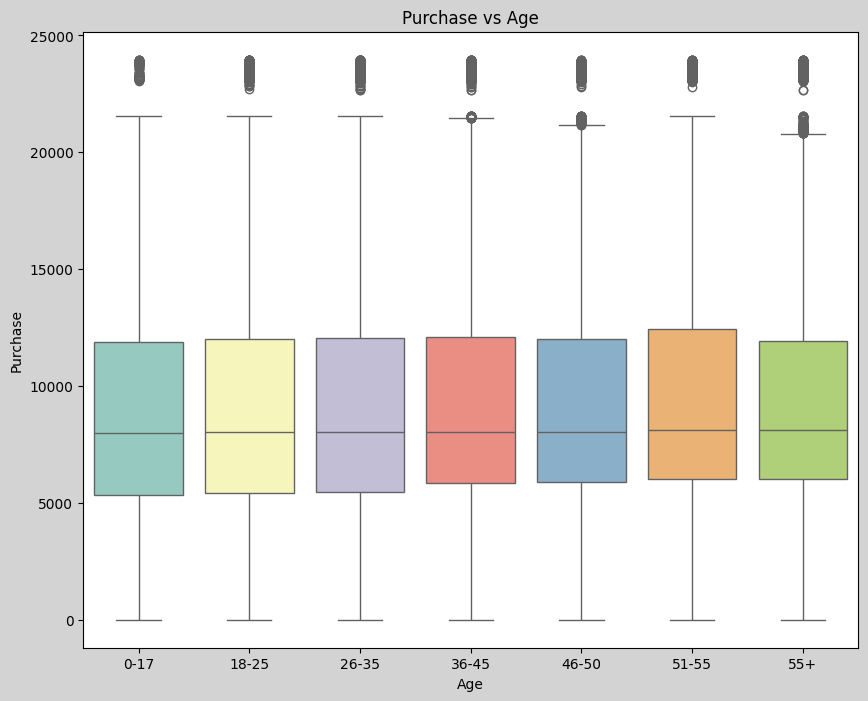

Number of outliers per age group:
Age
0-17      56
18-25    262
26-35    816
36-45    586
46-50    303
51-55    278
55+      250
Name: Purchase, dtype: int64


In [ ]:
# Create a box plot to visualize the distribution of purchase amounts by age group
plt.figure(figsize=(10, 8)).set_facecolor("lightgrey")
sns.boxplot(data=df, y='Purchase', x='Age', palette='Set3')
plt.title('Purchase vs Age')
plt.show()

# Calculate the number of outliers for each age group
def calculate_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_count = ((series < lower_bound) | (series > upper_bound)).sum()
    return outliers_count

# Get the number of outliers for each age group
outliers_per_age_group = df.groupby('Age')['Purchase'].apply(calculate_outliers)

print("Number of outliers per age group:")
print(outliers_per_age_group)


In [ ]:
df.groupby(['Age'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-17,15102.0,8933.464640,5111.114046,12.0,5328.0,7986.0,11874.0,23955.0
18-25,99660.0,9169.663606,5034.321997,12.0,5415.0,8027.0,12028.0,23958.0
26-35,219587.0,9252.690633,5010.527303,12.0,5475.0,8030.0,12047.0,23961.0
36-45,110013.0,9331.350695,5022.923879,12.0,5876.0,8061.0,12107.0,23960.0
46-50,45701.0,9208.625697,4967.216367,12.0,5888.0,8036.0,11997.0,23960.0
51-55,38501.0,9534.808031,5087.368080,12.0,6017.0,8130.0,12462.0,23960.0
55+,21504.0,9336.280459,5011.493996,12.0,6018.0,8105.5,11932.0,23960.0


* The high-value purchase (outlier: 816) beyond the upper limit is highest for age group 26-35 and gradually decreasing by age.
* The average order value is highest for age group 51-55 which is around 9534.
* While, the average amount is lowest for age group 0-17 which is around 8933.
* The highest order value for all the groups is around 23960.
* The smallest order value is 12 for all the groups.

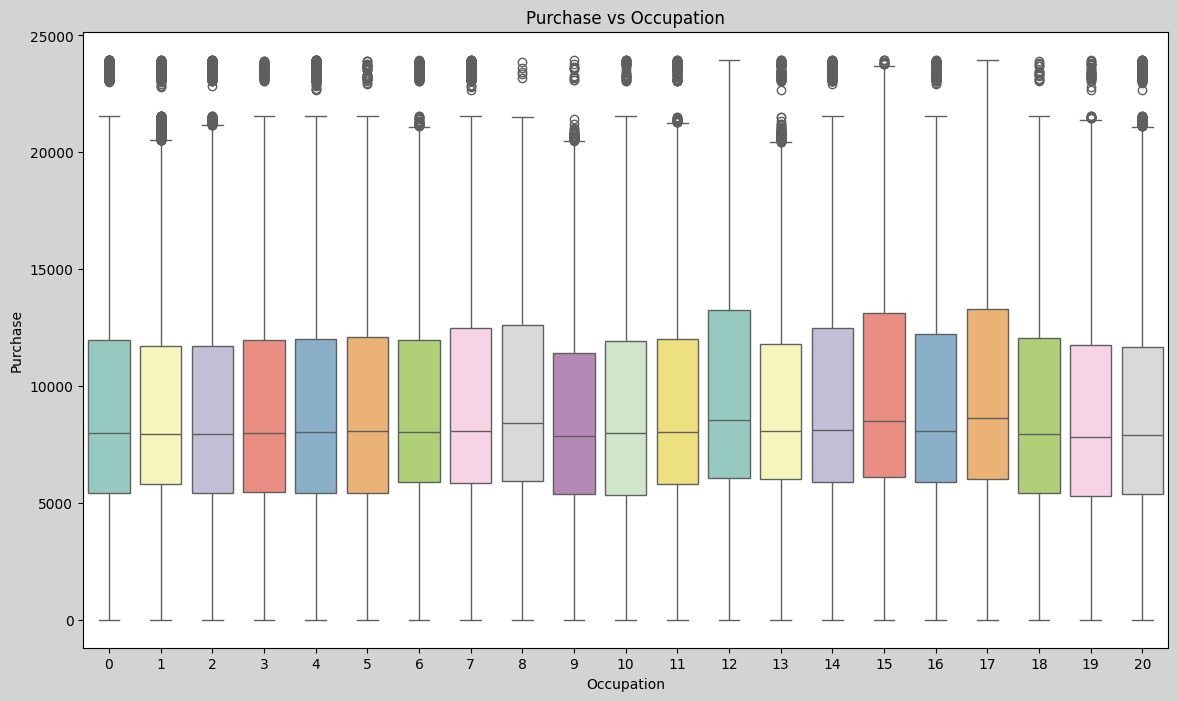

,count,mean,std,min,25%,50%,75%,max
Occupation,,,,,,,,
0,69638.0,9124.428588,4971.757402,12.0,5445.00,8001.0,11957.00,23961.0
1,47426.0,8953.193270,4838.482159,12.0,5825.00,7966.0,11702.75,23960.0
2,26588.0,8952.481683,4939.418663,12.0,5419.00,7952.0,11718.00,23955.0
3,17650.0,9178.593088,5000.942719,12.0,5478.00,8008.0,11961.00,23914.0
4,72308.0,9213.980251,5043.674855,12.0,5441.75,8043.0,12034.00,23961.0
5,12177.0,9333.149298,5025.616603,12.0,5452.00,8080.0,12091.00,23924.0
6,20355.0,9256.535691,4989.216005,12.0,5888.00,8050.0,11971.50,23951.0
7,59133.0,9425.728223,5086.097089,12.0,5878.00,8069.0,12486.00,23948.0
8,1546.0,9532.592497,4916.641374,14.0,5961.75,8419.5,12607.00,23869.0


In [ ]:
plt.figure(figsize = (14,8)).set_facecolor("lightgrey")
sns.boxplot(data = df, y ='Purchase', x = 'Occupation', palette = 'Set3')
plt.title('Purchase vs Occupation')
plt.show()
df.groupby(['Occupation'])['Purchase'].describe()

In [ ]:
# Assuming you already have the 'df' DataFrame containing the data

# Calculate mean and median for each occupation
mean_by_occupation = df.groupby('Occupation')['Purchase'].mean()
median_by_occupation = df.groupby('Occupation')['Purchase'].median()

# Find the occupation with the lowest mean
lowest_mean_occupation = mean_by_occupation.idxmin()

# Find the occupation with the highest mean
highest_mean_occupation = mean_by_occupation.idxmax()

# Find the occupation with the lowest median
lowest_median_occupation = median_by_occupation.idxmin()

# Find the occupation with the highest median
highest_median_occupation = median_by_occupation.idxmax()

print(f"Occupation with the lowest mean value: {lowest_mean_occupation}")
print(f"Occupation with the highest mean value: {highest_mean_occupation}")
print(f"Occupation with the lowest median value: {lowest_median_occupation}")
print(f"Occupation with the highest median value: {highest_median_occupation}")


Occupation with the lowest mean value: 9
Occupation with the highest mean value: 17
Occupation with the lowest median value: 19
Occupation with the highest median value: 17



* Occupation 17 have the high average (9821.47) & median (8635) order values compared to other occupation.
* Occupation 9 have the lowest average order value which is 8637.74.
* The lowest median value (7840) is for occupation 19.

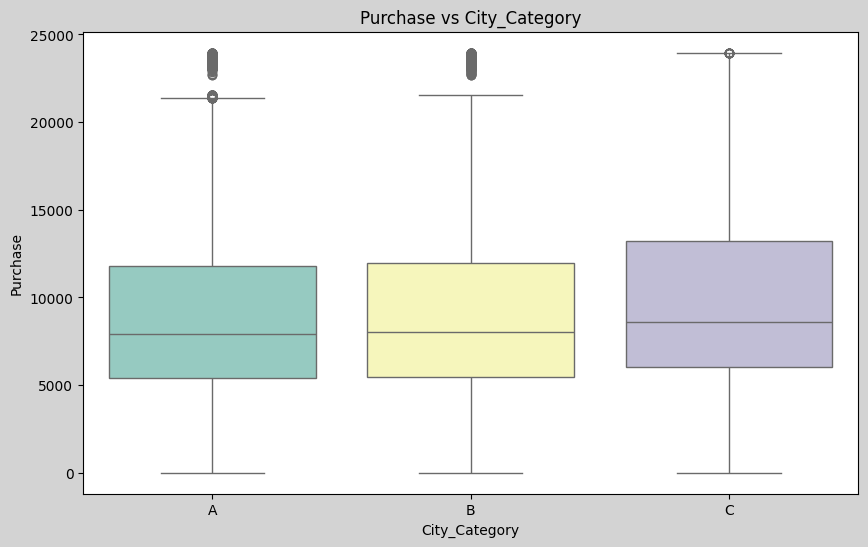

Number of purchase outliers per city category:
City_Category
A    702
B    927
C     17
dtype: int64


In [ ]:
plt.figure(figsize = (10,6)).set_facecolor("lightgrey")
sns.boxplot(data = df, y ='Purchase', x = 'City_Category', palette ='Set3')
plt.title('Purchase vs City_Category')
plt.show()

# Calculate Q1, Q3, and IQR for each city category
Q1 = df.groupby('City_Category')['Purchase'].quantile(0.25)
Q3 = df.groupby('City_Category')['Purchase'].quantile(0.75)
IQR = Q3 - Q1

# Determine outlier bounds for each city category
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outlier indices for each city category
outlier_indices = df.groupby('City_Category').apply(lambda x: ((x['Purchase'] < lower_bound[x.name]) | (x['Purchase'] > upper_bound[x.name])).sum())

print("Number of purchase outliers per city category:")
print(outlier_indices)


In [ ]:
df.groupby(['City_Category'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
City_Category,,,,,,,,
A,147720.0,8911.939216,4892.115238,12.0,5403.0,7931.0,11786.0,23961.0
B,231173.0,9151.300563,4955.496566,12.0,5460.0,8005.0,11986.0,23960.0
C,171175.0,9719.920993,5189.465121,12.0,6031.5,8585.0,13197.0,23961.0


* There are a 927 outliers for city B followed by A and C.
* We can observe that the mean value & median value for purchase made by users is highest for city C followed by B and A.

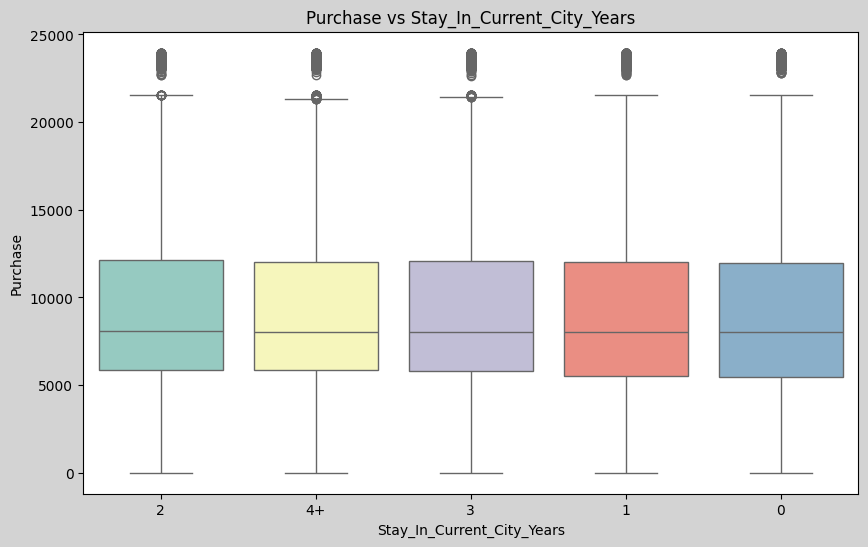

Number of purchase outliers per stay duration category:
Stay_In_Current_City_Years
0     322
1     861
2     400
3     471
4+    419
dtype: int64


,count,mean,std,min,25%,50%,75%,max
Stay_In_Current_City_Years,,,,,,,,
0,74398.0,9180.075123,4990.479940,12.0,5480.0,8025.0,11990.0,23960.0
1,193821.0,9250.145923,5027.476933,12.0,5500.0,8041.0,12042.0,23961.0
2,101838.0,9320.429810,5044.588224,12.0,5846.0,8072.0,12117.0,23961.0
3,95285.0,9286.904119,5020.343541,12.0,5832.0,8047.0,12075.0,23961.0
4+,84726.0,9275.598872,5017.627594,12.0,5844.0,8052.0,12038.0,23958.0


In [ ]:
plt.figure(figsize = (10,6)).set_facecolor("lightgrey")
sns.boxplot(data = df, y ='Purchase', x = 'Stay_In_Current_City_Years', palette = 'Set3')
plt.title('Purchase vs Stay_In_Current_City_Years')
plt.show()

# Calculate Q1, Q3, and IQR for each stay duration category
Q1 = df.groupby('Stay_In_Current_City_Years')['Purchase'].quantile(0.25)
Q3 = df.groupby('Stay_In_Current_City_Years')['Purchase'].quantile(0.75)
IQR = Q3 - Q1

# Determine outlier bounds for each stay duration category
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outlier indices for each stay duration category
outlier_indices = df.groupby('Stay_In_Current_City_Years').apply(lambda x: ((x['Purchase'] < lower_bound[x.name]) | (x['Purchase'] > upper_bound[x.name])).sum())

print("Number of purchase outliers per stay duration category:")
print(outlier_indices)

df.groupby(['Stay_In_Current_City_Years'])['Purchase'].describe()

* The number of purchase outlier are high for 1 year stay in current city.
* We can see that the mean & median value is almost the same for all the years.

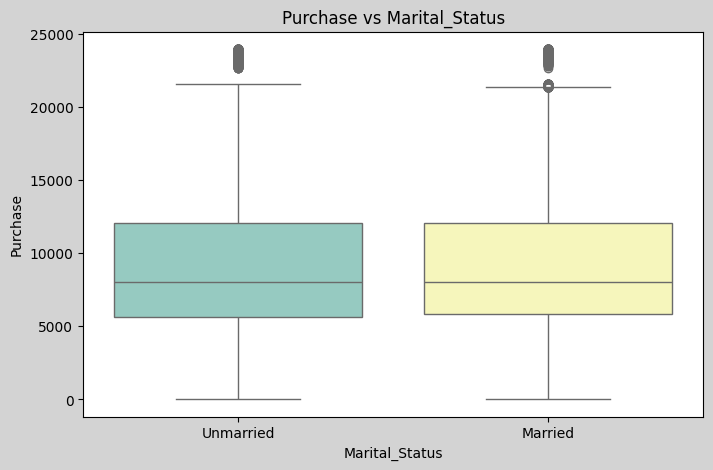

Number of purchase outliers per marital status:
Marital_Status
Unmarried    1303
Married      1233
dtype: int64


,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
Unmarried,324731.0,9265.907619,5027.347859,12.0,5605.0,8044.0,12061.0,23961.0
Married,225337.0,9261.174574,5016.897378,12.0,5843.0,8051.0,12042.0,23961.0


In [ ]:
plt.figure(figsize = (8,5)).set_facecolor("lightgrey")
sns.boxplot(data = df, y ='Purchase', x = 'Marital_Status', palette = 'Set3')
plt.title('Purchase vs Marital_Status')
plt.show()

# Calculate Q1, Q3, and IQR for each marital status
Q1 = df.groupby('Marital_Status')['Purchase'].quantile(0.25)
Q3 = df.groupby('Marital_Status')['Purchase'].quantile(0.75)
IQR = Q3 - Q1

# Determine outlier bounds for each marital status
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outlier indices for each marital status
outlier_indices = df.groupby('Marital_Status').apply(lambda x: ((x['Purchase'] < lower_bound[x.name]) | (x['Purchase'] > upper_bound[x.name])).sum())

print("Number of purchase outliers per marital status:")
print(outlier_indices)

df.groupby(['Marital_Status'])['Purchase'].describe()

Not much difference in mean and median purchasing value found in case of marrital status.

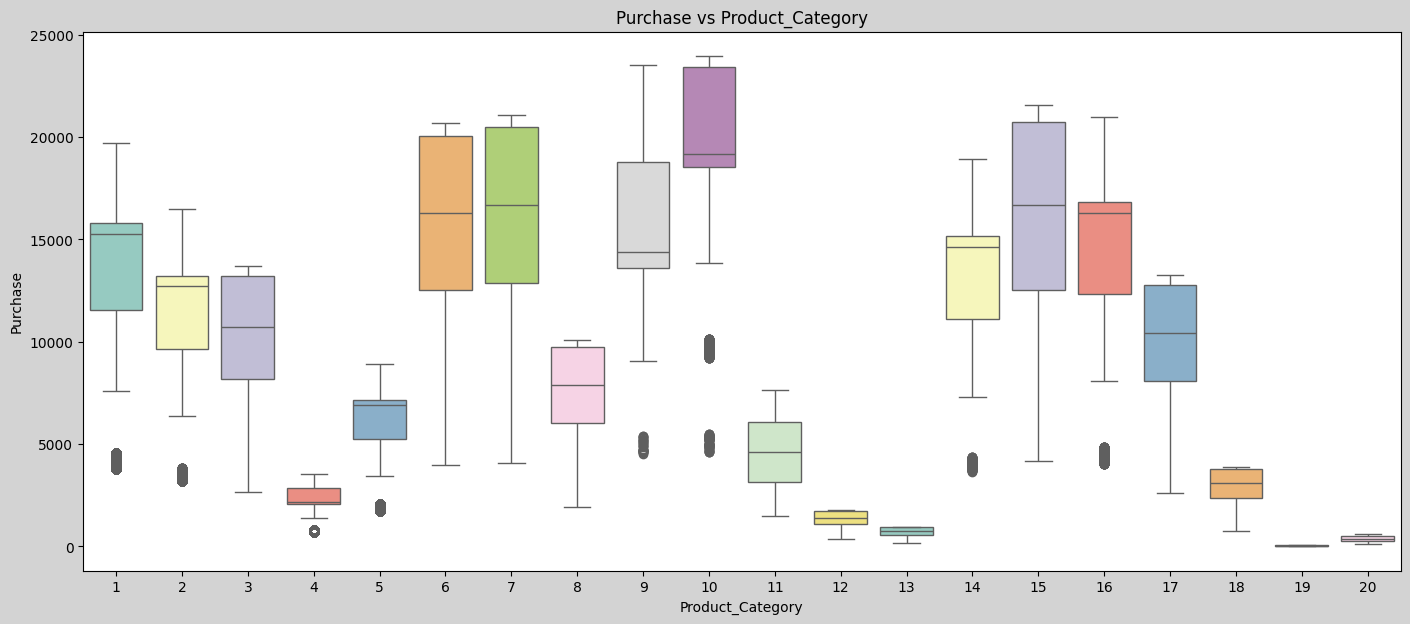

Number of purchase outliers per product category:
Product_Category
1     9018
2     1533
3        0
4     1143
5     8757
6        0
7        0
8        0
9       31
10     278
11       0
12       0
13       0
14      85
15       0
16     491
17       0
18       0
19       0
20       0
dtype: int64


,count,mean,std,min,25%,50%,75%,max
Product_Category,,,,,,,,
1,140378.0,13606.218596,4298.834894,3790.0,11546.00,15245.0,15812.00,19708.0
2,23864.0,11251.935384,3570.642713,3176.0,9645.75,12728.5,13212.00,16504.0
3,20213.0,10096.705734,2824.626957,2638.0,8198.00,10742.0,13211.00,13717.0
4,11753.0,2329.659491,812.540292,684.0,2058.00,2175.0,2837.00,3556.0
5,150933.0,6240.088178,1909.091687,1713.0,5242.00,6912.0,7156.00,8907.0
6,20466.0,15838.478550,4011.233690,3981.0,12505.00,16312.0,20051.00,20690.0
7,3721.0,16365.689600,4174.554105,4061.0,12848.00,16700.0,20486.00,21080.0
8,113925.0,7498.958078,2013.015062,1939.0,6036.00,7905.0,9722.00,10082.0
9,410.0,15537.375610,5330.847116,4528.0,13583.50,14388.5,18764.00,23531.0


In [ ]:
plt.figure(figsize = (17,7)).set_facecolor("lightgrey")
sns.boxplot(data = df, y ='Purchase', x = 'Product_Category', palette = 'Set3')
plt.title('Purchase vs Product_Category')
plt.show()

# Calculate Q1, Q3, and IQR for each product category
Q1 = df.groupby('Product_Category')['Purchase'].quantile(0.25)
Q3 = df.groupby('Product_Category')['Purchase'].quantile(0.75)
IQR = Q3 - Q1

# Determine outlier bounds for each product category
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outlier indices for each product category
outlier_indices = df.groupby('Product_Category').apply(lambda x: ((x['Purchase'] < lower_bound[x.name]) | (x['Purchase'] > upper_bound[x.name])).sum())

print("Number of purchase outliers per product category:")
print(outlier_indices)
df.groupby(['Product_Category'])['Purchase'].describe()

In [ ]:
# Calculate mean and median for each product category
mean_by_category = df.groupby('Product_Category')['Purchase'].mean()
median_by_category = df.groupby('Product_Category')['Purchase'].median()

# Find the product category with the highest mean
highest_mean_category = mean_by_category.idxmax()

# Find the product category with the lowest mean
lowest_mean_category = mean_by_category.idxmin()

# Find the product category with the highest median
highest_median_category = median_by_category.idxmax()

# Find the product category with the lowest median
lowest_median_category = median_by_category.idxmin()

print(f"Highest mean purchase value category: {highest_mean_category}")
print(f"Highest median purchase value category: {highest_median_category}")
print(f"Lowest mean purchase value category: {lowest_mean_category}")
print(f"Lowest median purchase value category: {lowest_median_category}")


Highest mean purchase value category: 10
Highest median purchase value category: 10
Lowest mean purchase value category: 19
Lowest median purchase value category: 19


* The mean (19675.57) & median (19197) purchase value for product category 10 is the highest. This product category is having 278 outliers below lower bound range.
* The mean and median value for product category 19 is the lowest which is only 37.

Multi-variate Analysis

Number of purchase outliers per gender and age category:
Gender  Age  
F       0-17      262
        18-25    1163
        26-35    1389
        36-45     358
        46-50     105
        51-55     464
        55+       495
M       0-17       38
        18-25     174
        26-35     639
        36-45     422
        46-50     196
        51-55     131
        55+       131
dtype: int64


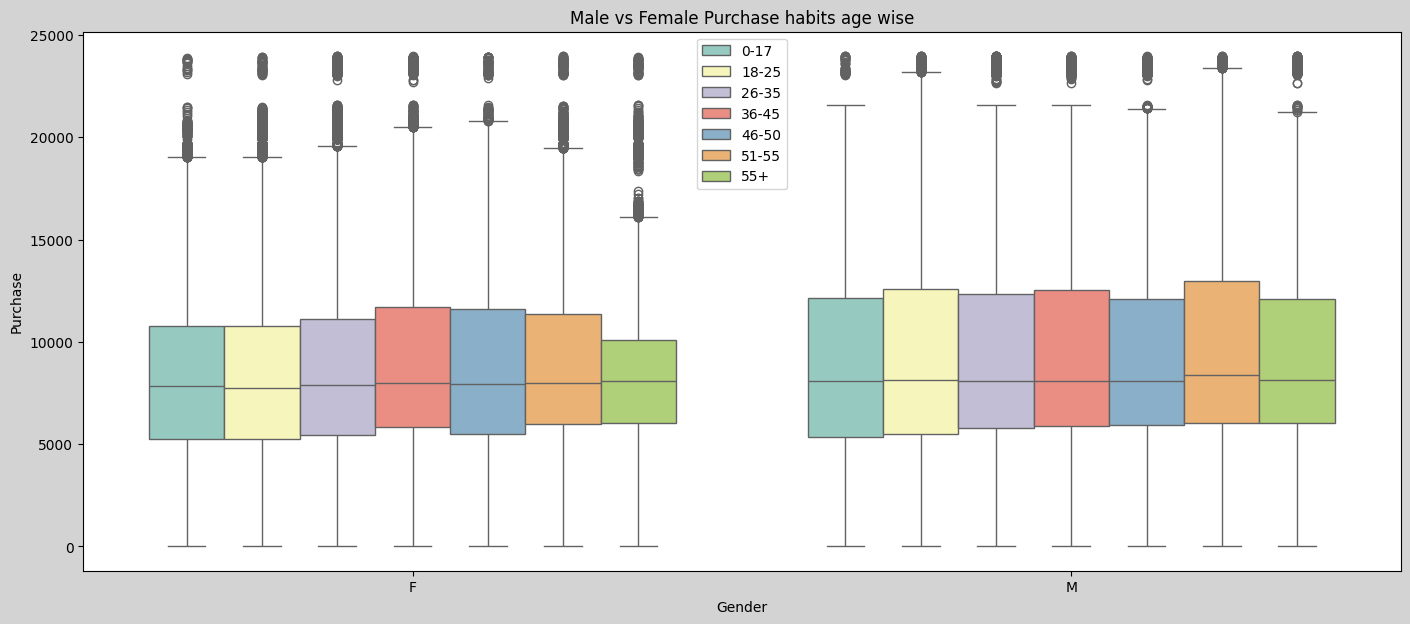

In [ ]:
plt.figure(figsize = (17,7)).set_facecolor("lightgrey")
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Age', palette='Set3')
plt.legend(loc=9)
plt.title('Male vs Female Purchase habits age wise')

# Calculate Q1, Q3, and IQR for each gender and age category
Q1 = df.groupby(['Gender', 'Age'])['Purchase'].quantile(0.25)
Q3 = df.groupby(['Gender', 'Age'])['Purchase'].quantile(0.75)
IQR = Q3 - Q1

# Determine outlier bounds for each category
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outlier indices for each category
outlier_indices = df.groupby(['Gender', 'Age']).apply(lambda x: ((x['Purchase'] < lower_bound[x.name]) | (x['Purchase'] > upper_bound[x.name])).sum())

print("Number of purchase outliers per gender and age category:")
print(outlier_indices)

plt.show()

In [ ]:
# Calculate mean and median for each gender and age category
mean_by_category = df.groupby(['Gender', 'Age'])['Purchase'].mean()
median_by_category = df.groupby(['Gender', 'Age'])['Purchase'].median()

# Find the category with the highest mean
highest_mean_category = mean_by_category.idxmax()

# Find the category with the lowest mean
lowest_mean_category = mean_by_category.idxmin()

# Find the category with the highest median
highest_median_category = median_by_category.idxmax()

# Find the category with the lowest median
lowest_median_category = median_by_category.idxmin()

print(f"Highest mean purchase value category: {highest_mean_category}")
print(f"Lowest mean purchase value category: {lowest_mean_category}")
print(f"Highest median purchase value category: {highest_median_category}")
print(f"Lowest median purchase value category: {lowest_median_category}")


Highest mean purchase value category: ('M', '51-55')
Lowest mean purchase value category: ('F', '0-17')
Highest median purchase value category: ('M', '51-55')
Lowest median purchase value category: ('F', '18-25')


Number of purchase outliers per gender and city category:
Gender  City_Category
F       A                1984
        B                2783
        C                 562
M       A                 458
        B                 721
        C                   0
dtype: int64


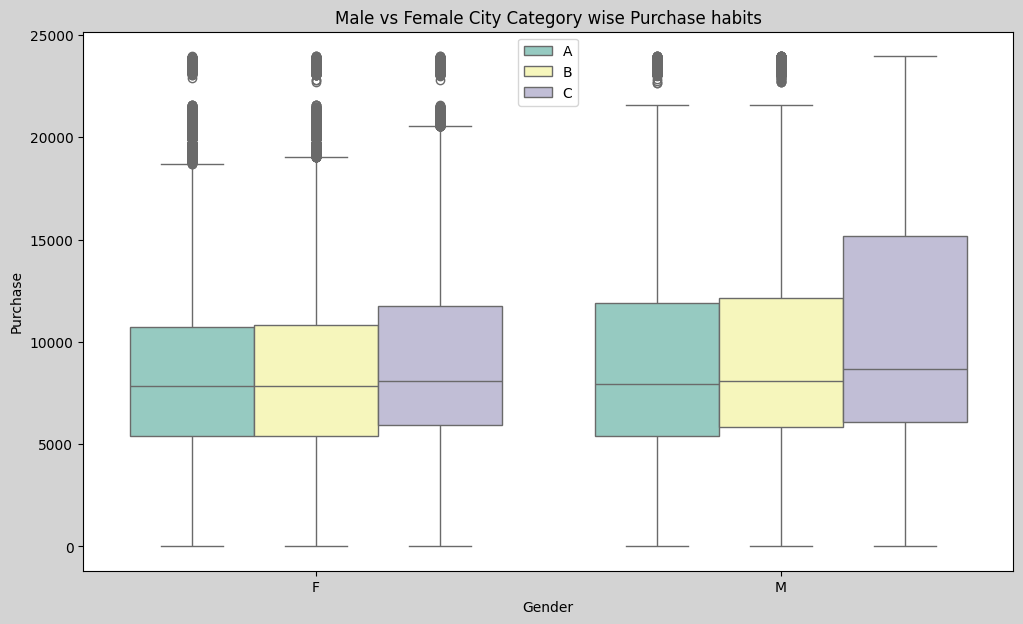

In [ ]:
plt.figure(figsize = (12,7)).set_facecolor("lightgrey")
sns.boxplot(data=df, y='Purchase', x='Gender', hue='City_Category',palette='Set3')
plt.legend(loc=9)
plt.title("Male vs Female City Category wise Purchase habits")

# Calculate Q1, Q3, and IQR for each gender and city category
Q1 = df.groupby(['Gender', 'City_Category'])['Purchase'].quantile(0.25)
Q3 = df.groupby(['Gender', 'City_Category'])['Purchase'].quantile(0.75)
IQR = Q3 - Q1

# Determine outlier bounds for each category
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outlier indices for each category
outlier_indices = df.groupby(['Gender', 'City_Category']).apply(lambda x: ((x['Purchase'] < lower_bound[x.name]) | (x['Purchase'] > upper_bound[x.name])).sum())

print("Number of purchase outliers per gender and city category:")
print(outlier_indices)

plt.show()

In [ ]:
# Calculate mean and median for each gender and city category
mean_by_category = df.groupby(['Gender', 'City_Category'])['Purchase'].mean()
median_by_category = df.groupby(['Gender', 'City_Category'])['Purchase'].median()

# Find the category with the highest mean
highest_mean_category = mean_by_category.idxmax()

# Find the category with the lowest mean
lowest_mean_category = mean_by_category.idxmin()

# Find the category with the highest median
highest_median_category = median_by_category.idxmax()

# Find the category with the lowest median
lowest_median_category = median_by_category.idxmin()

print(f"Highest mean purchase value category: {highest_mean_category}")
print(f"Highest median purchase value category: {highest_median_category}")
print(f"Lowest mean purchase value category: {lowest_mean_category}")
print(f"Lowest median purchase value category: {lowest_median_category}")


Highest mean purchase value category: ('M', 'C')
Highest median purchase value category: ('M', 'C')
Lowest mean purchase value category: ('F', 'B')
Lowest median purchase value category: ('F', 'B')


* Male staying in C city is have more purchase power than female.
* Female staying in B city is having less purchasing power.

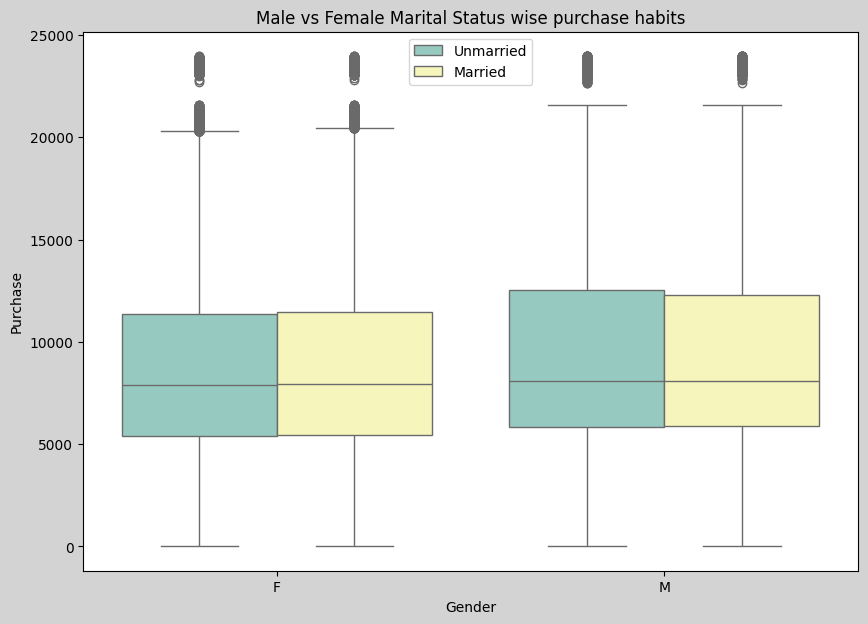

Number of purchase outliers per gender and marital status category:
Gender  Marital_Status
F       Unmarried         1215
        Married            829
M       Unmarried         1030
        Married            782
dtype: int64


In [ ]:
plt.figure(figsize = (10,7)).set_facecolor("lightgrey")
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Marital_Status', palette='Set3')
plt.legend(loc=9)
plt.title('Male vs Female Marital Status wise purchase habits')
plt.show()

import numpy as np

# Calculate Q1, Q3, and IQR for each combination of gender and marital status
Q1 = df.groupby(['Gender', 'Marital_Status'])['Purchase'].quantile(0.25)
Q3 = df.groupby(['Gender', 'Marital_Status'])['Purchase'].quantile(0.75)
IQR = Q3 - Q1

# Determine outlier bounds for each combination
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outlier indices for each combination
outlier_indices = df.groupby(['Gender', 'Marital_Status']).apply(lambda x: ((x['Purchase'] < lower_bound[x.name]) | (x['Purchase'] > upper_bound[x.name])).sum())

print("Number of purchase outliers per gender and marital status category:")
print(outlier_indices)




In [ ]:
# Calculate mean and median for each combination of gender and marital status
mean_by_category = df.groupby(['Gender', 'Marital_Status'])['Purchase'].mean()
median_by_category = df.groupby(['Gender', 'Marital_Status'])['Purchase'].median()

# Find the combination with the highest mean
highest_mean_category = mean_by_category.idxmax()

# Find the combination with the lowest mean
lowest_mean_category = mean_by_category.idxmin()

# Find the combination with the highest median
highest_median_category = median_by_category.idxmax()

# Find the combination with the lowest median
lowest_median_category = median_by_category.idxmin()

print(f"Highest mean purchase value category: {highest_mean_category}")
print(f"Highest median purchase value category: {highest_median_category}")
print(f"Lowest mean purchase value category: {lowest_mean_category}")
print(f"Lowest median purchase value category: {lowest_median_category}")


Highest mean purchase value category: ('M', 'Unmarried')
Highest median purchase value category: ('M', 'Unmarried')
Lowest mean purchase value category: ('F', 'Unmarried')
Lowest median purchase value category: ('F', 'Unmarried')


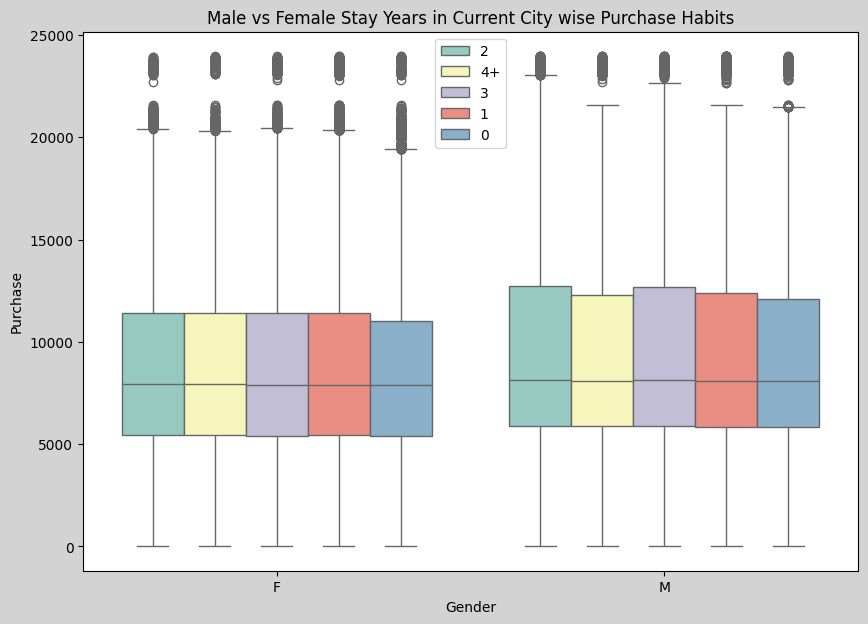

In [ ]:
plt.figure(figsize = (10,7)).set_facecolor("lightgrey")
sns.boxplot(data=df, y='Purchase', x='Gender',
hue='Stay_In_Current_City_Years', palette='Set3')
plt.legend(loc=9)
plt.title('Male vs Female Stay Years in Current City wise Purchase Habits')
plt.show()

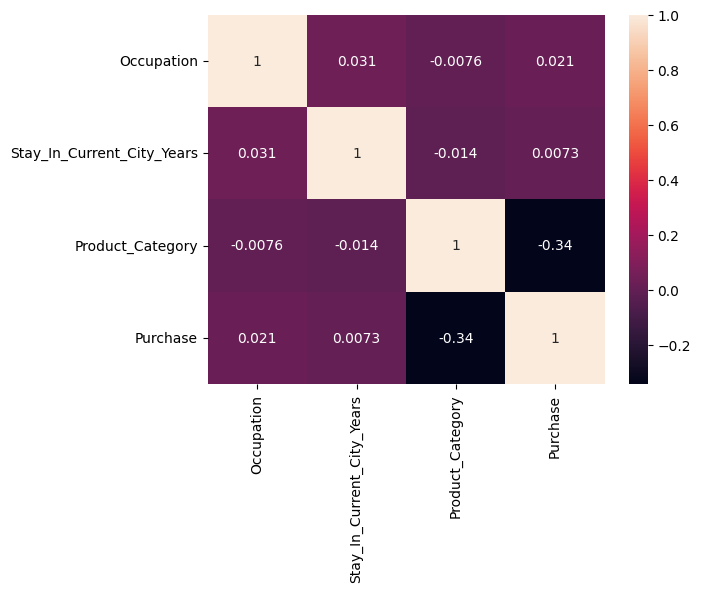

In [ ]:
# Convert the 'Stay_In_Current_City_Years' column to numeric, handling non-numeric values
df['Stay_In_Current_City_Years'] = pd.to_numeric(df['Stay_In_Current_City_Years'], errors='coerce')

# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['number'])

sns.heatmap(numerical_df.corr(), annot=True)
plt.show()

In [ ]:
# Convert the 'Stay_In_Current_City_Years' column to numeric, replacing non-numeric values with NaN
df['Stay_In_Current_City_Years'] = pd.to_numeric(df['Stay_In_Current_City_Years'], errors='coerce')

# Calculate correlations on the numeric columns only
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True)
plt.show()

In [ ]:
sns.pairplot(df)
plt.show()

Central Limit Theorem

In [ ]:
def bootstrap(sample1,sample2,sample_size,itr_size=1000,ci=90):
    ci = ci/100
    plt.figure(figsize=(16,8))
    sample1_n = [np.mean(sample1.sample(sample_size)) for i in range(itr_size)]
    sample2_n = [np.mean(sample2.sample(sample_size)) for i in range(itr_size)]
    mean1 = np.mean(sample1_n) # Calculate mean1 here
# For Sample1's means
    sigma1 = np.std(sample1_n)
    sem1 = stats.sem(sample1_n)
    lower_limit_1 = norm.ppf((1-ci)/2) * sigma1 + mean1
    upper_limit_1 = norm.ppf(ci+(1-ci)/2) * sigma1 + mean1
# For Sample2's means
    mean2 = np.mean(sample2_n)
    sigma2 = np.std(sample2_n)
    sem2 = stats.sem(sample2_n)
    lower_limit_2 = norm.ppf((1-ci)/2) * sigma2 + mean2
    upper_limit_2 = norm.ppf(ci + (1-ci)/2) * sigma2 + mean2
    sns.kdeplot(data = sample1_n, color="#F2D2BD", fill = True, linewidth = 2)
    label_mean1=("μ (Males) : {:.2f}".format(mean1))
    plt.axvline(mean1, color = '#FF00FF', linestyle = 'solid', linewidth = 2, label=label_mean1)
    label_limits1=("Lower Limit(M): {:.2f}\nUpper Limit(M):{:.2f}".format(lower_limit_1,upper_limit_1))
    plt.axvline(lower_limit_1, color = '#FF69B4', linestyle ='dashdot', linewidth = 2, label=label_limits1)
    plt.axvline(upper_limit_1, color = '#FF69B4', linestyle ='dashdot', linewidth = 2)
    sns.kdeplot(data = sample2_n ,color='#ADD8E6', fill = True, linewidth = 2)
    label_mean2=("μ (Females): {:.2f}".format(mean2))
    plt.axvline(mean2, color = '#1434A4', linestyle = 'solid',linewidth = 2, label=label_mean2)
    label_limits2=("Lower Limit(F): {:.2f}\nUpper Limit(F): {:.2f}".format(lower_limit_2,upper_limit_2))
    plt.axvline(lower_limit_2, color = '#4682B4', linestyle ='dashdot', linewidth = 2, label=label_limits2)
    plt.axvline(upper_limit_2, color = '#4682B4', linestyle ='dashdot', linewidth = 2)
    plt.title(f"Sample Size: {sample_size}, Male Avg: {np.round(mean1,2)}, Male SME: {np.round(sem1,2)}, Female Avg:{np.round(mean2, 2)}, Female SME: {np.round(sem2,2)}")
    plt.legend(loc = 'upper right')
    plt.xlabel('Purchase')
    plt.ylabel('Density')
    return round(mean1,2), round(mean2,2), round(lower_limit_1,2), round(upper_limit_1,2), round(lower_limit_2,2), round(upper_limit_2,2)

In [ ]:
df_male = df[df['Gender']=='M']
df_female = df[df['Gender']=='F']

In [ ]:
plt.figure(figsize=(12,8))
sns.set(style='dark')
sns.displot(x= 'Purchase',data=df,hue='Gender',bins=25)
plt.show()
df.groupby(['Gender'])['Purchase'].describe()

In [ ]:
sample_sizes = [10,100,1000,10000,100000]
ci = 90
itr_size = 1000
res = [] # Use a list to store the results temporarily
for i in sample_sizes:
    m_avg, f_avg, ll_m, ul_m, ll_f, ul_f = bootstrap(df_male['Purchase'],df_female['Purchase'],i,itr_size,ci)
    res.append({'Gender':'M','Sample Size':i,'Lower Limit':ll_m,'Upper Limit':ul_m,'Sample Mean':m_avg,'Confidence Interval':ci,'Interval Range':[ll_m,ul_m],'Range': ul_m-ll_m})
    res.append({'Gender':'F','Sample Size':i,'Lower Limit':ll_f,'Upper Limit':ul_f,'Sample Mean':f_avg,'Confidence Interval':ci,'Interval Range':[ll_f,ul_f],'Range': ul_f-ll_f})

res = pd.DataFrame(res) # Create the DataFrame after the loop

In [ ]:
sample_sizes = [10,100,1000,10000,100000]
ci = 95
itr_size = 1000
new_rows = [] # Create a list to hold new rows
for i in sample_sizes:
    m_avg, f_avg, ll_m, ul_m, ll_f, ul_f = bootstrap(df_male['Purchase'],df_female['Purchase'],i,itr_size,ci)
    new_rows.append({'Gender':'M','Sample Size':i,'Lower Limit':ll_m,'Upper Limit':ul_m,'Sample Mean':m_avg,'Confidence Interval':ci,'Interval Range':[ll_m,ul_m],'Range': ul_m-ll_m})
    new_rows.append({'Gender':'F','Sample Size':i,'Lower Limit':ll_f,'Upper Limit':ul_f,'Sample Mean':f_avg,'Confidence Interval':ci,'Interval Range':[ll_f,ul_f],'Range': ul_f-ll_f})

# Use pd.concat to append the new rows to the DataFrame
res = pd.concat([res, pd.DataFrame(new_rows)], ignore_index=True)